In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv("MUSE_20211119_134612_49000.csv")
df.columns = [col.strip() for col in df.columns]
df.drop(columns=[""], inplace=True)
df.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-24,-19,4,21,-14,-7,-244,43,-24,-58,-48,-34
1,-53,-24,29,39,-41,2,-244,29,-39,-73,-68,-48
2,-19,-4,14,12,-17,4,-248,29,-39,-78,-58,-43
3,39,39,0,-39,19,19,-244,39,-34,-63,-43,-29
4,14,29,14,-21,0,21,-263,14,-63,-82,-68,-53


In [4]:
df.shape

(5000, 12)

In [5]:
df = df / 1000.0

In [6]:
df.describe()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.001446,0.001662,0.000270,-0.001565,0.000577,0.000984,0.008663,0.005109,0.002855,-0.001027,0.001697,0.002272
std,0.066417,0.131697,0.080363,0.096203,0.033172,0.103874,0.093465,0.096512,0.416871,0.344654,0.284399,0.222559
min,-0.209000,-0.258000,-0.117000,-0.722000,-0.200000,-0.158000,-0.668000,-0.673000,-2.298000,-1.576000,-1.083000,-0.766000
25%,-0.039000,-0.063000,-0.039000,-0.017000,-0.017000,-0.046000,-0.004000,-0.009000,-0.117000,-0.165000,-0.122000,-0.092000
50%,-0.009000,-0.029000,-0.019000,0.019000,0.002000,-0.024000,0.024000,0.014000,-0.068000,-0.107000,-0.092000,-0.068000
75%,0.024000,0.014000,0.009000,0.046000,0.021000,0.007000,0.048000,0.043000,0.082000,0.058000,-0.009000,-0.014000
max,0.380000,1.063000,0.697000,0.229000,0.109000,0.873000,0.258000,0.200000,1.093000,1.317000,1.498000,1.322000


<AxesSubplot:ylabel='V3'>

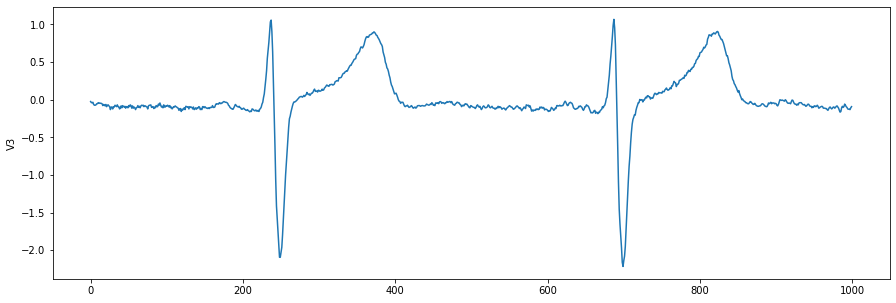

In [7]:
import seaborn as sns

sns.lineplot(data=df["V3"][:1000])

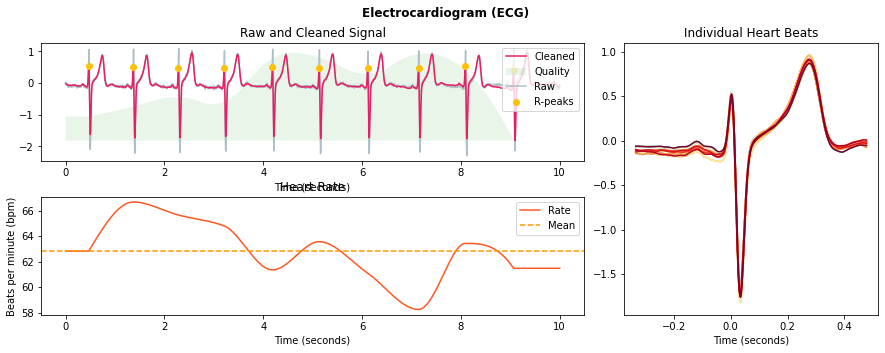

In [8]:
ecg_signals, info = nk.ecg_process(df["V3"], sampling_rate=500)
plot = nk.ecg_plot(ecg_signals, sampling_rate=500)

In [9]:
signals, info = nk.ecg_process(df["V3"], sampling_rate=500)

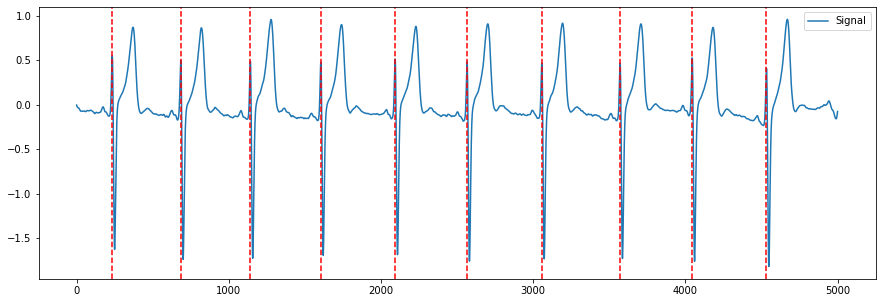

In [10]:
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
plot = nk.events_plot(rpeaks, cleaned_ecg)

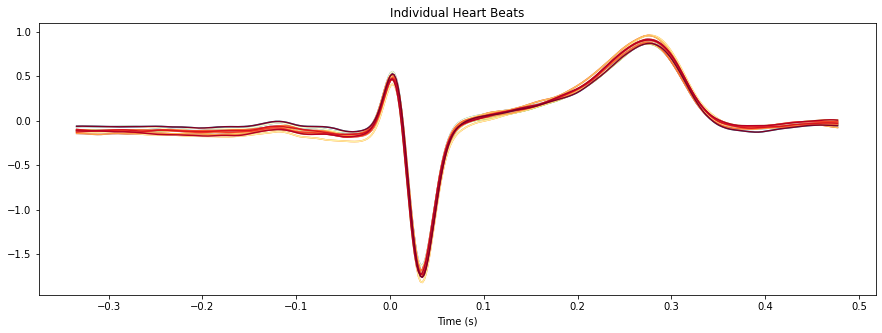

In [11]:
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=500, show=True)

## Locate P, Q, S and T waves in ECG

In [12]:
_, rpeaks = nk.ecg_peaks(df["V3"], sampling_rate=500)

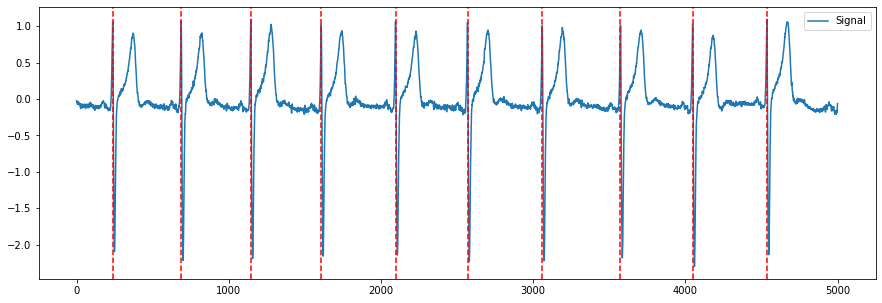

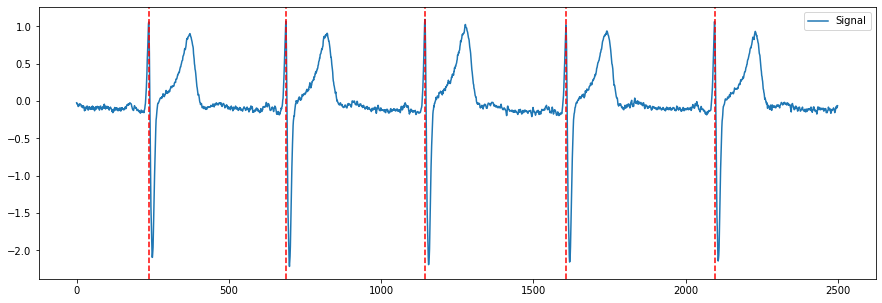

In [13]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], df["V3"])

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], df["V3"][:2500])

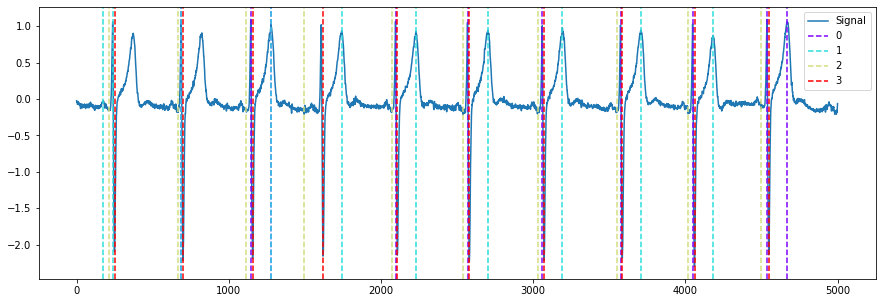

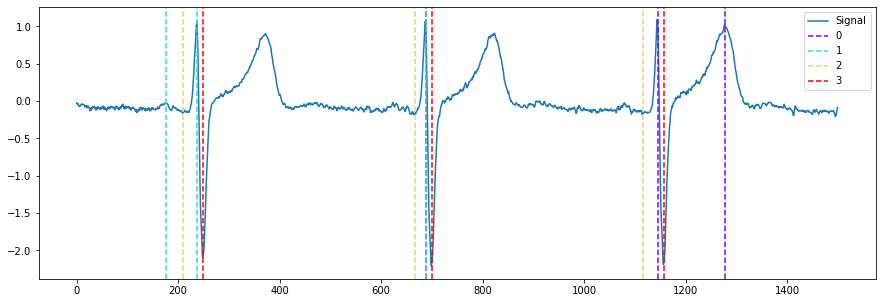

In [14]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(df["V3"], rpeaks, sampling_rate=3000, method="peak")
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], df["V3"])

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], df["V3"][:1500])

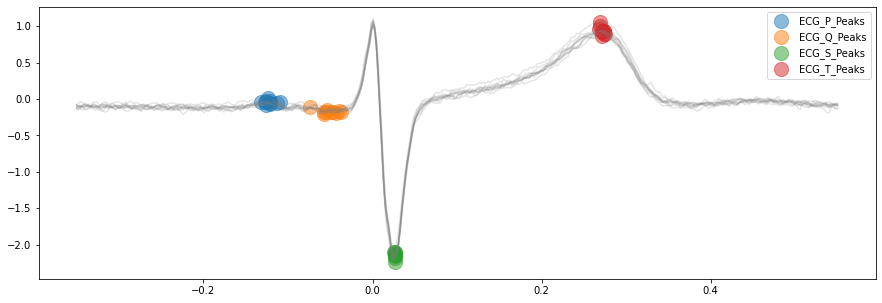

In [15]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(df["V3"], rpeaks, sampling_rate=500, method="peak", show=True, show_type='peaks')

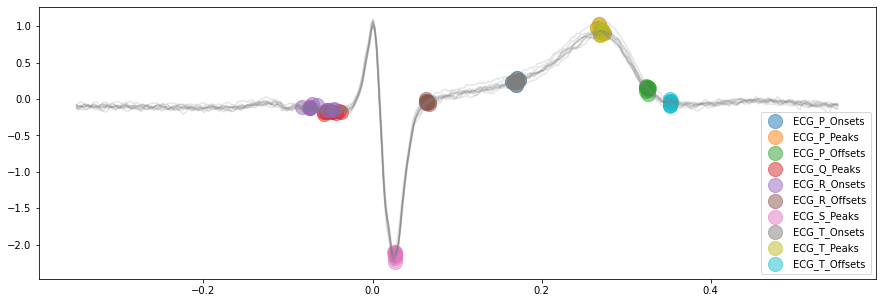

In [16]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(df["V3"], rpeaks, sampling_rate=500, method="cwt", show=True, show_type='all')

## Show only R onsets and offsets

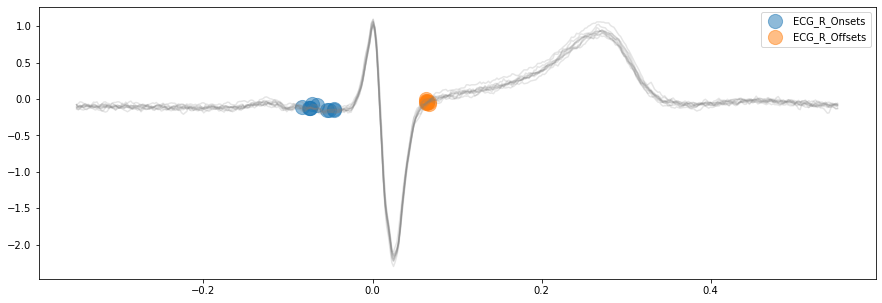

In [17]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(df["V3"], rpeaks, sampling_rate=500, method="cwt", show=True, show_type='bounds_R')

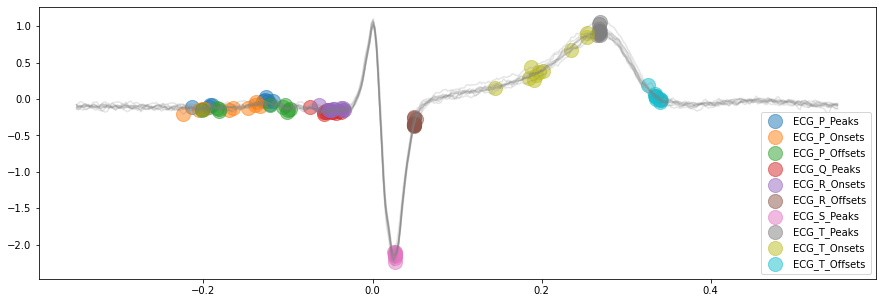

In [18]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(df["V3"], rpeaks, sampling_rate=500, method="dwt", show=True, show_type='all')

## Heart Rate Varability (HRV)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,955.111111,39.712858,NaN,NaN,NaN,NaN,NaN,NaN,42.332021,44.100534,0.041579,0.044322,948.0,41.5128,0.04379,50.0,11.111111,66.666667,4.5,46.875


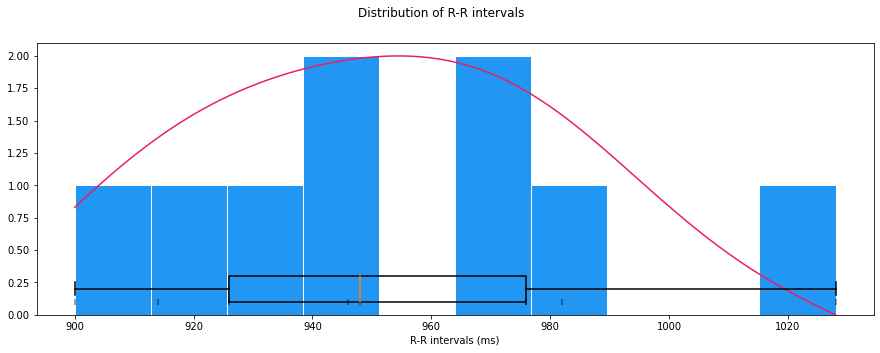

In [19]:
# Find peaks
peaks, info = nk.ecg_peaks(df["V3"], sampling_rate=500)
hrv_time = nk.hrv_time(peaks, sampling_rate=500, show=True)
hrv_time